In [6]:
import zipfile
import os

# Define the path to the uploaded zip file
zip_path = "C:/Users/Aryan/Desktop/pro/env/FINANCIAL MODELLING/archive.zip"
extract_path = "C:/Users/Aryan/Desktop/pro/env/FINANCIAL MODELLING/sp500_data"

# Extract the contents of the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List the contents of the extracted folder
extracted_files = os.listdir(extract_path)
extracted_files


['all_stocks_5yr.csv', 'getSandP.py', 'individual_stocks_5yr', 'merge.sh']

In [ ]:
!pip install openpyxl

In [ ]:
!pip install scipy

In [33]:
!pip install scikit-learn

     ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
     - -------------------------------------- 0.5/11.1 MB 11.4 MB/s eta 0:00:01
     ----- ---------------------------------- 1.4/11.1 MB 14.9 MB/s eta 0:00:01
     -------- ------------------------------- 2.4/11.1 MB 17.3 MB/s eta 0:00:01
     ------------ --------------------------- 3.6/11.1 MB 19.2 MB/s eta 0:00:01
     ---------------- ----------------------- 4.7/11.1 MB 20.0 MB/s eta 0:00:01
     --------------------- ------------------ 5.9/11.1 MB 20.8 MB/s eta 0:00:01
     ------------------------- -------------- 7.0/11.1 MB 21.4 MB/s eta 0:00:01
     ----------------------------- ---------- 8.1/11.1 MB 21.5 MB/s eta 0:00:01
     --------------------------------- ------ 9.3/11.1 MB 22.1 MB/s eta 0:00:01
     ------------------------------------ -- 10.5/11.1 MB 23.4 MB/s eta 0:00:01
     --------------------------------------  11.1/11.1 MB 24.2 MB/s eta 0:00:01
     --------------------------------------- 11.


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Aryan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [35]:
!pip install matplotlib

     ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
      --------------------------------------- 0.1/8.1 MB 2.8 MB/s eta 0:00:03
     - -------------------------------------- 0.3/8.1 MB 3.4 MB/s eta 0:00:03
     - -------------------------------------- 0.4/8.1 MB 2.7 MB/s eta 0:00:03
     -- ------------------------------------- 0.4/8.1 MB 2.5 MB/s eta 0:00:04
     -- ------------------------------------- 0.5/8.1 MB 2.1 MB/s eta 0:00:04
     -- ------------------------------------- 0.5/8.1 MB 1.9 MB/s eta 0:00:04
     -- ------------------------------------- 0.5/8.1 MB 1.7 MB/s eta 0:00:05
     -- ------------------------------------- 0.5/8.1 MB 1.7 MB/s eta 0:00:05
     -- ------------------------------------- 0.5/8.1 MB 1.4 MB/s eta 0:00:06
     -- ------------------------------------- 0.6/8.1 MB 1.2 MB/s eta 0:00:07
     -- ------------------------------------- 0.6/8.1 MB 1.1 MB/s eta 0:00:07
     --- ------------------------------------ 0.6/8.1 MB 1.1 MB/s eta 0


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Aryan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd
import os

# Define paths
input_csv = "C:/Users/Aryan/Desktop/pro/env/FINANCIAL MODELLING/sp500_data/all_stocks_5yr.csv"
output_dir = "C:/Users/Aryan/Desktop/pro/env/FINANCIAL MODELLING/outputs"
os.makedirs(output_dir, exist_ok=True)

# Load and clean data
df = pd.read_csv(input_csv)
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date', 'open', 'high', 'low'])
df = df.sort_values(['Name', 'date']).reset_index(drop=True)

# Save cleaned data
df.to_csv(os.path.join(output_dir, 'cleaned_sp500.csv'), index=False)
df.to_excel(os.path.join(output_dir, 'cleaned_sp500.xlsx'), index=False)
 
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,45.07,45.35,45.00,45.08,1824755,A
1,2013-02-11,45.17,45.18,44.45,44.60,2915405,A
2,2013-02-12,44.81,44.95,44.50,44.62,2373731,A
3,2013-02-13,44.81,45.24,44.68,44.75,2052338,A
4,2013-02-14,44.72,44.78,44.36,44.58,3826245,A


In [12]:
# Re-import necessary modules after code execution state reset
import pandas as pd
import os

# Re-define the working directories
project_root = "C:/Users/Aryan/Desktop/pro/env/FINANCIAL MODELLING/"
output_dir = os.path.join(project_root, "outputs")
cleaned_csv_path = os.path.join(output_dir, "cleaned_sp500.csv")

# Load the cleaned dataset
df = pd.read_csv(cleaned_csv_path)
df['date'] = pd.to_datetime(df['date'])

# Group the data by ticker (Name) and calculate daily returns
daily_returns = df.copy()
daily_returns['daily_return'] = daily_returns.groupby('Name')['close'].pct_change()

# Calculate monthly returns
monthly_returns = (
    df.set_index('date')
    .groupby('Name')['close']
    .resample('M')
    .last()
    .pct_change()
    .reset_index()
    .rename(columns={'close': 'monthly_return'})
)

# Calculate volatility (standard deviation of daily returns)
volatility = (
    daily_returns.groupby('Name')['daily_return']
    .std()
    .reset_index()
    .rename(columns={'daily_return': 'volatility'})
)

# Calculate CAGR
def calculate_cagr(group):
    start_price = group.iloc[0]['close']
    end_price = group.iloc[-1]['close']
    num_years = (group['date'].iloc[-1] - group['date'].iloc[0]).days / 365.25
    return (end_price / start_price) ** (1 / num_years) - 1 if num_years > 0 else 0

cagr = (
    df.groupby('Name')
    .apply(calculate_cagr)
    .reset_index()
    .rename(columns={0: 'CAGR'})
)

# Calculate Sharpe Ratio (assuming risk-free rate = 0 for simplicity)
sharpe = (
    daily_returns.groupby('Name')['daily_return']
    .mean() / daily_returns.groupby('Name')['daily_return'].std()
).reset_index().rename(columns={'daily_return': 'sharpe_ratio'})

# Max Drawdown
def max_drawdown(prices):
    roll_max = prices.cummax()
    drawdown = (prices - roll_max) / roll_max
    return drawdown.min()

drawdown = (
    df.groupby('Name')['close']
    .apply(max_drawdown)
    .reset_index()
    .rename(columns={'close': 'max_drawdown'})
)

# Merge all metrics into one dataframe
metrics_df = volatility.merge(cagr, on='Name') \
                       .merge(sharpe, on='Name') \
                       .merge(drawdown, on='Name')

# Export the final metrics to CSV
metrics_path_csv = os.path.join(output_dir, 'investment_metrics.csv')
metrics_df.to_csv(metrics_path_csv, index=False)

metrics_df.head()


,Name,volatility,CAGR,sharpe_ratio,max_drawdown
0,A,0.015482,0.085941,0.029280,-0.452322
1,AAL,0.022456,0.283833,0.055457,-0.546808
2,AAP,0.018958,0.068631,0.023391,-0.603853
3,AAPL,0.014593,0.186614,0.053875,-0.320752
4,ABBV,0.016856,0.256890,0.062305,-0.322336


In [14]:
# Load the metrics data
metrics_df = pd.read_csv("C:/Users/Aryan/Desktop/pro/env/FINANCIAL MODELLING/outputs/investment_metrics.csv")

# Select top 20 stocks by Sharpe Ratio
top_stocks = metrics_df.sort_values(by='sharpe_ratio', ascending=False).head(20)['Name'].tolist()
print(top_stocks)


['DXC', 'HLT', 'NOC', 'NVDA', 'LMT', 'RTN', 'STZ', 'CTAS', 'HII', 'BA', 'SPGI', 'FISV', 'APTV', 'UNH', 'FTV', 'ADBE', 'GD', 'EA', 'ALGN', 'AVGO']


In [15]:
# Load cleaned S&P 500 data
df = pd.read_csv("C:/Users/Aryan/Desktop/pro/env/FINANCIAL MODELLING/outputs/cleaned_sp500.csv")
df['date'] = pd.to_datetime(df['date'])

# Filter for selected stocks
portfolio_df = df[df['Name'].isin(top_stocks)]

# Pivot data to get closing prices with stocks as columns
price_data = portfolio_df.pivot(index='date', columns='Name', values='close').dropna()
price_data.head()


Name,ADBE,ALGN,APTV,AVGO,BA,CTAS,DXC,EA,FISV,FTV,GD,HII,HLT,LMT,NOC,NVDA,RTN,SPGI,STZ,UNH
date,,,,,,,,,,,,,,,,,,,,
2017-12-05,167.54,227.36,88.77,261.65,275.54,156.28,92.87,103.38,130.88,72.95,199.91,232.79,77.63,310.14,297.75,187.74,183.85,167.89,216.82,220.09
2017-12-06,173.52,233.01,85.36,263.89,278.27,156.50,93.38,103.18,130.56,73.29,200.21,233.65,76.75,311.97,300.20,189.26,185.20,168.62,216.93,219.94
2017-12-07,174.61,241.38,84.38,263.89,281.97,158.00,94.65,104.37,131.20,73.60,200.17,235.86,77.28,314.42,302.68,191.99,186.14,169.53,216.85,220.15
2017-12-08,173.57,238.43,85.22,259.91,285.90,159.18,95.93,105.27,131.72,73.69,201.07,237.01,78.38,315.85,305.67,191.49,188.07,171.21,217.98,223.91
2017-12-11,174.31,233.66,85.89,259.95,283.16,158.33,95.77,107.92,131.83,73.01,199.64,234.10,77.47,316.17,304.56,194.66,187.08,171.70,219.37,222.77


In [16]:
returns = price_data.pct_change().dropna()


In [17]:
n_assets = len(top_stocks)
equal_weights = np.array([1/n_assets] * n_assets)

# Portfolio daily returns
portfolio_returns = returns @ equal_weights
portfolio_cum_returns = (1 + portfolio_returns).cumprod()

# Portfolio performance metrics
mean_daily_return = portfolio_returns.mean()
volatility = portfolio_returns.std()
sharpe_ratio = mean_daily_return / volatility * np.sqrt(252)  # annualized

print(f"CAGR: {(portfolio_cum_returns.iloc[-1]) ** (1/((portfolio_cum_returns.index[-1] - portfolio_cum_returns.index[0]).days / 365.25)) - 1:.2%}")
print(f"Volatility: {volatility * np.sqrt(252):.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")


CAGR: 48.82%
Volatility: 16.03%
Sharpe Ratio: 2.59


In [22]:
import numpy as np
from scipy.optimize import minimize

# These should already exist from earlier:
# - 'returns' as daily returns of top stocks
# - 'top_stocks' list
# - 'price_data' as the pivoted price dataframe
def portfolio_performance(weights, mean_returns, cov_matrix):
    ret = np.dot(weights, mean_returns)
    vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe = ret / vol
    return ret, vol, sharpe

def neg_sharpe(weights, mean_returns, cov_matrix):
    return -portfolio_performance(weights, mean_returns, cov_matrix)[2]

def check_sum(weights):
    return np.sum(weights) - 1


In [23]:
mean_returns = returns.mean() * 252  # Annualized mean return
cov_matrix = returns.cov() * 252     # Annualized covariance

n_assets = len(top_stocks)
init_guess = [1/n_assets] * n_assets
bounds = [(0, 1)] * n_assets
constraints = {'type': 'eq', 'fun': check_sum}

result = minimize(neg_sharpe, init_guess, args=(mean_returns, cov_matrix),
                  method='SLSQP', bounds=bounds, constraints=constraints)

opt_weights = result.x  # <== This is what was missing earlier


In [24]:
portfolio_weights_df = pd.DataFrame({
    'Stock': top_stocks,
    'Equal Weight': equal_weights,
    'Optimized Weight': opt_weights
})

portfolio_weights_df.to_csv("C:/Users/Aryan/Desktop/pro/env/FINANCIAL MODELLING/outputs/portfolio_weights.csv", index=False)
portfolio_weights_df.head()


,Stock,Equal Weight,Optimized Weight
0,DXC,0.05,2.827539e-01
1,HLT,0.05,0.000000e+00
2,NOC,0.05,4.554598e-16
3,NVDA,0.05,0.000000e+00
4,LMT,0.05,2.759670e-01


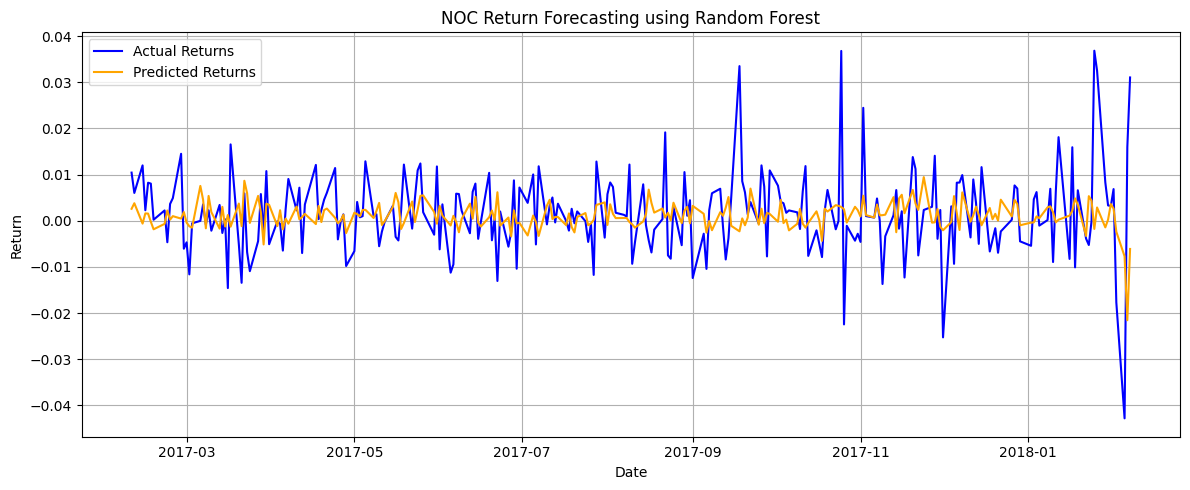

(9.1215818035573e-05, -0.11187587737867011)

In [44]:
# Re-import necessary modules and re-execute Module 5 since the kernel was reset
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the cleaned dataset again
cleaned_path = "C:/Users/Aryan/Desktop/pro/env/FINANCIAL MODELLING/outputs/cleaned_sp500.csv"
df = pd.read_csv(cleaned_path, parse_dates=['date'])

# Preprocess data (from Module 2 logic)
df.set_index('date', inplace=True)
price_data = df.pivot(columns='Name', values='close').dropna(axis=1)

# Calculate daily returns
daily_returns = price_data.pct_change().dropna()

# Select top 5 stocks by Sharpe Ratio for forecasting
mean_returns = daily_returns.mean()
volatility = daily_returns.std()
sharpe_ratios = mean_returns / volatility
top_stocks = sharpe_ratios.sort_values(ascending=False).head(5).index.tolist()

# Create lag features for a selected stock
returns_df = daily_returns[top_stocks].copy()
lagged_features = 5
for lag in range(1, lagged_features + 1):
    for stock in top_stocks:
        returns_df[f'{stock}_lag{lag}'] = returns_df[stock].shift(lag)

# Drop rows with NaNs due to lagging
returns_df.dropna(inplace=True)

# Forecasting target stock
target_stock = top_stocks[0]
X = returns_df[[f'{target_stock}_lag{lag}' for lag in range(1, lagged_features + 1)]]
y = returns_df[target_stock]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot actual vs predicted
plt.figure(figsize=(12, 5))
plt.plot(y_test.index, y_test.values, label='Actual Returns', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Returns', color='orange')
plt.title(f'{target_stock} Return Forecasting using Random Forest')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

mse, r2
